In [ ]:
from fastai.vision import *

In [ ]:
pip install fastbook


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (4

In [ ]:
from fastbook import *
urls = search_images_ddg('Powdery Mildew', max_images=100)
len(urls),urls[0]

(100,
 'http://www.amgrow.com.au/wp-content/uploads/sites/4/2016/08/AdobeStock_117112619.jpeg')

In [ ]:
pip install duckduckgo-search


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.4 MB/s eta 0:00:00


In [ ]:
pip install fastbook


In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(searchTerm, maxImages=50):
  print(f"Searching for '{searchTerm}'")
  results = L(DDGS().images(
    keywords=searchTerm,
    max_results=maxImages
    )).itemgot('image')

  return results

In [ ]:
searches = 'Images of Powdery Mildew leaf','Images of healthy leaf'
path = Path('MIG 29_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} full Body'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} side photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} in air'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Images of Powdery Mildew leaf full Body'


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Searching for 'Images of Powdery Mildew leaf side photo'
Searching for 'Images of Powdery Mildew leaf in air'
Searching for 'Images of healthy leaf full Body'
Searching for 'Images of healthy leaf side photo'
Searching for 'Images of healthy leaf in air'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

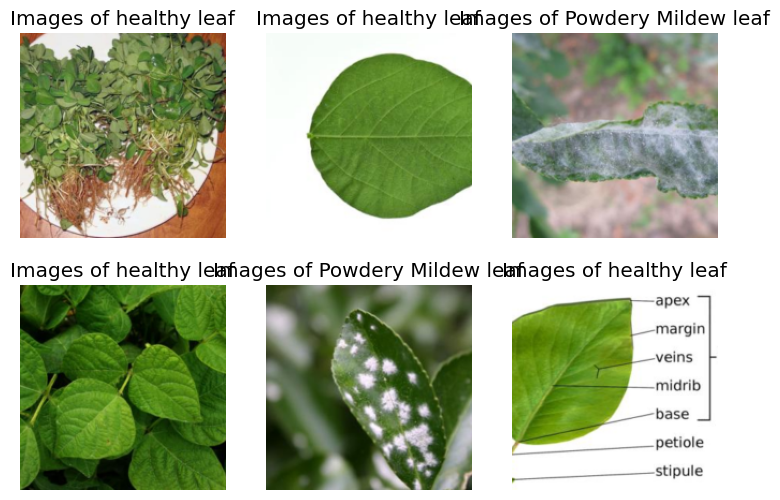

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='RandomResizeCrop')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.093854,0.439140,0.203704,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.253855,0.271868,0.129630,00:49
1,0.170550,0.170916,0.074074,00:47
2,0.136969,0.151998,0.074074,00:50


                               precision    recall  f1-score   support

Images of Powdery Mildew leaf       0.93      0.93      0.93        27
       Images of healthy leaf       0.93      0.93      0.93        27

                     accuracy                           0.93        54
                    macro avg       0.93      0.93      0.93        54
                 weighted avg       0.93      0.93      0.93        54



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


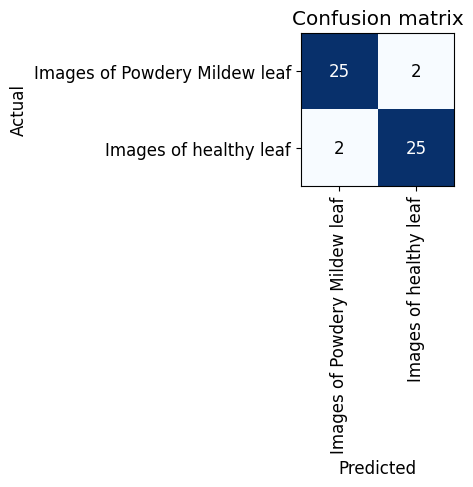

In [ ]:
conf = ClassificationInterpretation.from_learner(learn)
conf.print_classification_report()
conf.plot_confusion_matrix()

In [ ]:
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

In [ ]:
if uploader.data:
    img = PILImage.create(uploader.data[1])
    is_MIG29,_,probs = learn.predict(img)
    print(f"Probability it's a leaf: {probs[1].item():.6f}")
else:
    print("No image uploaded")

No image uploaded


                               precision    recall  f1-score   support

Images of Powdery Mildew leaf       0.93      0.93      0.93        27
       Images of healthy leaf       0.93      0.93      0.93        27

                     accuracy                           0.93        54
                    macro avg       0.93      0.93      0.93        54
                 weighted avg       0.93      0.93      0.93        54



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


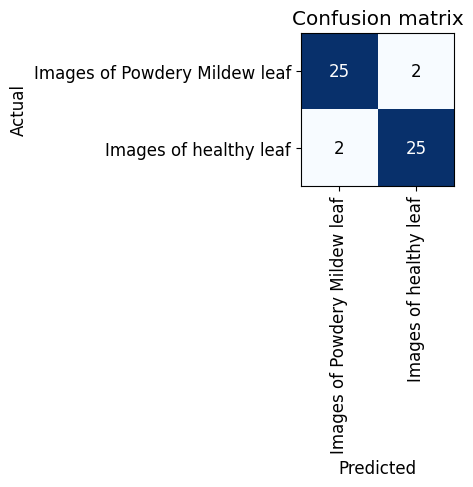

In [ ]:
conf = ClassificationInterpretation.from_learner(learn)
conf.print_classification_report()
conf.plot_confusion_matrix()

In [ ]:
learn.export()
learn.dls.vocab

['Images of Powdery Mildew leaf', 'Images of healthy leaf']

In [ ]:
learn.path = Path('.')

In [ ]:

labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
import gradio as gr


def predict(image):
    # Implement the prediction logic here
    # ...
    return prediction

# Create the interface
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(),  # Remove the 'shape' argument
    outputs=gr.Label(num_top_classes=3)
)

# Launch the interface
interface.launch(share=True)

ModuleNotFoundError: No module named 'gradio'

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=f2bf257d6689ce2c52f3d4df84c231178c447ab5d2a889f4dc9ba6660c108fda
  Stor